In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir(r'C:\Users\Vish\Documents\Data\Dataset')
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']  
#dataset = pd.read_csv(url, names=names)  
dataset = pd.read_csv("Iris.csv") 

In [3]:
dataset.drop(['Id'],1,inplace=True)

In [4]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = dataset.drop('Species', 1)  
y = dataset['Species']  

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [7]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

[0.72226528 0.23974795 0.03338117 0.0046056 ]


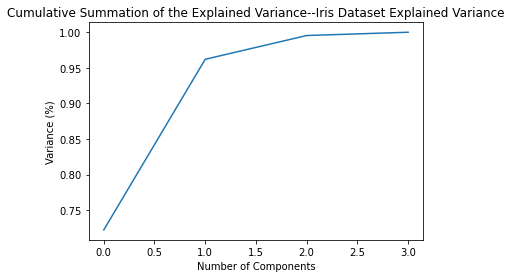

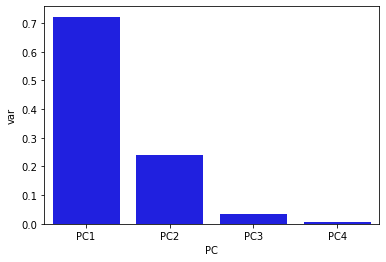

In [8]:
#Variance Explained by all principal components
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Cumulative Summation of the Explained Variance--Iris Dataset Explained Variance')
plt.show()

#Scree plot
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
df.head()
sns.barplot(x='PC',y="var", 
           data=df, color="blue");

In [9]:
#4 Pc
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print(accuracy_score(y_test, y_pred)) 

[[11  0  0]
 [ 0 11  2]
 [ 0  1  5]]
0.9


In [10]:
#3 PC
pca = PCA(n_components=3)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print(accuracy_score(y_test, y_pred))  

[[11  0  0]
 [ 0  8  5]
 [ 0  1  5]]
0.8


In [11]:
#2 PC
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print(accuracy_score(y_test, y_pred))  

[[11  0  0]
 [ 0  9  4]
 [ 0  2  4]]
0.8


In [12]:
#1 PC
from sklearn.decomposition import PCA
pca = PCA(n_components=1)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print(accuracy_score(y_test, y_pred)) 

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
0.9333333333333333
